# Multilayer Perception implemented in numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import get_names

In [2]:
words = get_names()
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


- bigram character language model
- receives a single character as input; output is the probability distribution of the next character in the sequence
- using gradient descent 

In [3]:
characters = ['.', *sorted({c for w in words for c in w})]
print(characters)
print(len(characters))
index = {
    c:i
    for i, c in enumerate(characters)
}
index
print(index)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [4]:
# create the training set of all of the bigrams
# x is the input, y is the target (i.e. the next character)
x, y = [], []
training_data = []
for w in words:
    chars = ['.',  *w, '.']
    for c1, c2 in zip(chars, chars[1:]):
        x.append(index[c1])
        y.append(index[c2])

x = np.array(x)
y = np.array(y)

print(x[:10])
print(y[:10])

[ 0  5 13 13  1  0 15 12  9 22]
[ 5 13 13  1  0 15 12  9 22  9]


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


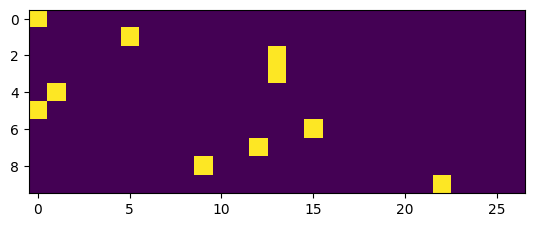

In [5]:
# encode
def one_hot_encode(index: int) -> np.array:
    """Return a one-hot encoded vector of the given index."""
    vector = np.zeros(len(characters))
    vector[index] = 1
    return vector

x_encoded = np.array([one_hot_encode(i) for i in x])
y_encoded = np.array([one_hot_encode(i) for i in y])

print(x_encoded[:6])
plt.imshow(x_encoded[0:10])

In [6]:
seed = 42
rng = np.random.default_rng(seed)

input_size = len(characters)
hidden_size = 50
output_size = len(characters)

# weights between input and hidden layer
W_1 = rng.normal(size=(hidden_size, input_size)) * 0.01
# biases of the hidden layer
b_1 = np.zeros((hidden_size, 1))
W_2 = rng.normal(size=(output_size, hidden_size)) * 0.01
b_2 = np.zeros((output_size, 1))

print(W_1.shape)
print(b_1.shape)
print(W_2.shape)
print(b_2.shape)

(50, 27)
(50, 1)
(27, 50)
(27, 1)


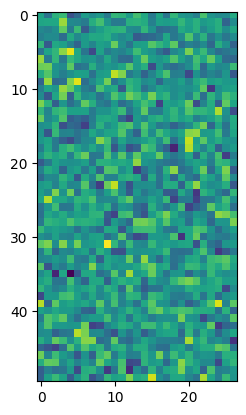

In [7]:
plt.imshow(W_1)

---

# Forward Pass

## Relationship between "fully connected" layers and matrix multiplication 

In [8]:
x_batch = x_encoded[:32]
x_batch.shape
y_batch = y_encoded[:32]
print(f"We have a batch of {x_batch.shape[0]} examples, each with {x_batch.shape[1]} features (one hot encoding of characters).")  # noqa

We have a batch of 32 examples, each with 27 features (one hot encoding of characters).


We need to calculate the "pre-activation values" which is a value that connects each neuron to an example in the batch.

The `pre-activations` are a matrix of values corresponding to the neurons in the hidden layer (`50`) and the batch size (`32`).

The pre-activations are calculated by matrix-multiplying the weights of the input/hidden layer by the batch examples/features and adding the bias.

In [9]:
pre_activations = ((W_1 @ x_batch.T) + b_1)
pre_activations.shape

(50, 32)

In [10]:
print(f"dot(W, x.T) = dot((neurons, input), (input, batch)) = dot({W_1.shape}, {x_batch.T.shape})")

dot(W, x.T) = dot((neurons, input), (input, batch)) = dot((50, 27), (27, 32))


In [11]:
pre_activations_hidden = np.dot(W_1, x_batch.T)
assert (pre_activations == pre_activations_hidden).all()  # biases are all zeros at this point
print(f"dot(W, x.T) = dot((neurons, input), (input, batch)) = dot({W_1.shape}, {x_batch.T.shape}) = ({pre_activations_hidden.shape})")  # noqa
assert (pre_activations_hidden == W_1 @ x_batch.T).all()
# np.dot(W1, X)

dot(W, x.T) = dot((neurons, input), (input, batch)) = dot((50, 27), (27, 32)) = ((50, 32))


Matrix multiplication is calculated by taking the first row of the first matrix and the first column of the second matrix and doing a dot product (multiplying all corresponding elements together and then summing across all results), and repeating for all row/column combinations of the first and second matrix respectively.

However, in order to do the matrix multiplication with our weight matrix and batch matrix, we have to transpose the batch matrix.

We start with these dimensions `(neurons x input_size) @ (batch_size x input_size)`

But we need `(neurons x input_size) @ (input_size x batch_size)`

And so we take the first row of the weight matrix and the first column of the transposed batch matrix and do a dot product. But the `first column of the transposed batch matrix` is the same as the first row of the non-transposed batch matrix. So really, each value in the pre-activation matrix is the dot product of the connections of a particular neuron (e.g. the first row in weights matrix is the first neuron) to the inputs of a particular example (e.g. first row in batch matrix) resulting an a matrix that has 50 rows corresponding to the the number of neurons and 32 columns corresponding to each of the examples.

In [12]:
# first row of weights, and first column of transposed input
w_row = W_1[0, :]
xt_column = x_batch.T[:, 0]
w_row.shape, xt_column.shape
# dot product is just the sum of the element-wise product
assert np.dot(w_row, xt_column) == (w_row * xt_column).sum()

In [13]:
# but the first column of transposed input is just the first row of the input (non-transposed)
for r in range(len(x_batch)):
    assert (x_batch.T[:, r] == x_batch[r, :]).all()

assert np.dot(w_row, xt_column) == np.dot(w_row, x_batch[0, :])
# and so below, we don't need to transpose the input and we can just use the dot product
# for each row (i.e. nueron) of the weights and each row (example) of the input

In [14]:
# manual dot product i.e. matrix multiplication
# matrix multiplication is the dot product of the rows of the first matrix with the columns of the
# second matrix
assert W_1.shape[1] == x_batch.T.shape[0]
# the result will have the same number of rows as the first matrix and the same number of columns
pre_activations_manual = np.zeros((W_1.shape[0], x_batch.shape[0]))
for i in range(W_1.shape[0]):
    for j in range(x_batch.shape[0]):
        pre_activations_manual[i, j] = np.dot(W_1[i], x_batch[j])

print(pre_activations_manual.shape)
assert (pre_activations_manual == pre_activations_hidden).all()

(50, 32)


In [15]:
# and so the first element in the pre-activations is the dot product of the first row (neuron) of the
# weights and the first row (example) of the input (we haven't included the bias yet)
# in other words, the first neuron is connected to each of the inputs (27) with a weight, which is
# why our weights matrix has 27 columns. Each column is a weight for each input. The matrix
# connects all of the inputs to all of the neurons. The dot product of the first row of the weights
# and the first row of the input is the sum of the element-wise product of the two vectors. This
# is the pre-activation of the first neuron for the first example. There are 50 neurons and 32 examples
# so the pre-activations matrix is 50 x 32
assert pre_activations_hidden[0,0] == np.dot(W_1[0, :], x_batch[0, :])

---

## Actual Pass

In [16]:
def relu(x: np.array) -> np.array:
    """Return the ReLU of the input."""
    return np.maximum(0, x)

def relu_derivative(x: np.array) -> np.array:
    """
    Return the derivative of the ReLU of the input.
    """
    return (x > 0).astype(float)

def softmax(x: np.array) -> np.array:
    """
    Return the softmax of the input.

    The softmax function is a generalization of the logistic function that "squashes" a
    K-dimensional
    vector z of arbitrary real values to a K-dimensional vector sigma(z) of real values in the
    range (0, 1) that add up to 1.

    In other words, the softmax function transforms a vector of real values into a probability
    distribution.
    """
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1).reshape(-1, 1)

def softmax_derivative(x: np.array) -> np.array:
    """
    Return the derivative of the softmax of the input.
    https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
    """
    return softmax(x) * (1 - softmax(x))


example = np.array([
    [1, 2, 3],
    [3, 0, 7],
])
print(example)
print(softmax(example).round(3))
print(softmax(example).sum(axis=1))

[[1 2 3]
 [3 0 7]]
[[0.09  0.245 0.665]
 [0.018 0.001 0.981]]
[1. 1.]


In [17]:
# # activations for first layer
# Z_1 = (W_1 @ x_batch.T) + b_1  # pre-activations for layer 1
# A_1 = relu(Z_1)  # activations for layer 1
# print(f"({W_1.shape} @ {x_batch.T.shape}) + {b_1.shape} = ({A_1.shape})")
# Z_2 = (W_2 @ A_1) + b_2  # pre-activations for layer 2
# A_2 = softmax(Z_2)  # activations for layer 2 are probabilities
# # our output size is 27 which happens to be the same as the input size (but in general doesn't
# # have to be the same)
# # so the result is 27 outputs for each of the 32 examples
# print(f"({W_2.shape} @ {A_1.shape}) + {b_2.shape} = ({A_2.shape})")

---

Let's swap the shape of the weights so that we don't have to transpose and end up with a 32x27 rather than a 27x32 matrix  

In [18]:
seed = 42
rng = np.random.default_rng(seed)

input_size = len(characters)
hidden_size = 50
output_size = len(characters)

# weights between input and hidden layer
# W_1 = rng.normal(size=(hidden_size, input_size)) * 0.01
W_1 = rng.normal(size=(input_size, hidden_size)) * 0.01
# biases of the hidden layer
# b_1 = np.zeros((hidden_size, 1))
b_1 = np.zeros((1, hidden_size))
# W_2 = rng.normal(size=(output_size, hidden_size)) * 0.01
W_2 = rng.normal(size=(hidden_size, output_size)) * 0.01
# b_2 = np.zeros((output_size, 1))
b_2 = np.zeros((1, output_size))

print(W_1.shape)
print(b_1.shape)
print(W_2.shape)
print(b_2.shape)

(27, 50)
(1, 50)
(50, 27)
(1, 27)


In [19]:
# activations for first layer
z_1 = (x_batch @ W_1) + b_1  # pre-activations for layer 1
A_1 = relu(z_1)  # activations for layer 1
print(f"({x_batch.shape} @ {W_1.shape}) + {b_1.shape} = ({A_1.shape})")
Z_2 = (A_1 @ W_2) + b_2  # pre-activations for layer 2
print(f"{A_1.shape} @ {W_2.shape} + {b_2.shape} = ({Z_2.shape})")
# A_Z is refered to as "logits"
A_2 = softmax(Z_2)  # activations for layer 2 are probabilities
# # our output size is 27 which happens to be the same as the input size (but in general doesn't
# # have to be the same)
# # so the result is 27 outputs for each of the 32 examples
print(A_2.shape)
A_2.sum(axis=1)

((32, 27) @ (27, 50)) + (1, 50) = ((32, 50))
(32, 50) @ (50, 27) + (1, 27) = ((32, 27))
(32, 27)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
# loss via cross-entropy
# we want to minimize the cross-entropy loss
# we want to maximize the log likelihood
# we want to minimize the negative log likelihood
# the negative log likelihood is the cross-entropy loss
predicted_probabilities = A_2
# each row is an example (batch size of 32), each column is a class probability (27 characters)
# this means that each row should sum to 1
assert (predicted_probabilities.sum(axis=1).round(7) == 1).all()
# what is the probability associated with the actual/correct character for each example?
predicted_probabilities.shape, y_batch.shape

((32, 27), (32, 27))

In [41]:
row_indices = np.arange(y_batch.shape[0])
column_indices = np.argmax(y_batch, axis=1)
pred_prob_of_actual = predicted_probabilities[row_indices, column_indices]
assert len(pred_prob_of_actual) == y_batch.shape[0]
pred_prob_of_actual

array([0.03704604, 0.03703422, 0.03704669, 0.03707962, 0.03704387,
       0.03705516, 0.03703479, 0.03701309, 0.03705521, 0.03705294,
       0.03702826, 0.03704387, 0.03703125, 0.03704525, 0.03707254,
       0.03704387, 0.03703706, 0.0370181 , 0.03704728, 0.03704484,
       0.03699079, 0.03703334, 0.03702542, 0.03704438, 0.03704387,
       0.03705072, 0.03705704, 0.03705362, 0.03702426, 0.03704956,
       0.03702826, 0.03704387])

In [50]:
log_likelihood = np.log(pred_prob_of_actual).mean()
negative_log_likelihood = -log_likelihood
# I believe negative log likelihood is the same as cross-entropy loss
print(f"loss (negative log likelihood) = {negative_log_likelihood}")

loss (negative log likelihood) = 3.2957239985861353


## Chat GPT Explanation of Backpropegation 

### Goal of Finding the Derivative of the Loss Function

The primary goal of finding the derivative (or gradient) of the loss function with respect to the network's parameters (weights and biases) is to understand how changes in those parameters affect the loss. This understanding allows us to adjust the parameters in a way that minimizes the loss, thereby improving the model's predictions. The process of using these derivatives to update the network's parameters is known as gradient descent.

### Backpropagation Explained

Backpropagation is the algorithm used for efficiently computing these gradients. It works by:

1. **Performing a forward pass** through the network to calculate the outputs (and intermediate activations) for a given input.
2. **Computing the loss** by comparing the network's output to the true labels.
3. **Propagating the loss backward** through the network, layer by layer, to find the gradient of the loss with respect to each parameter.

### Your Layers and Forward Pass

Your setup defines a simple 2-layer neural network (1 hidden layer and 1 output layer). The weight initialization and biases look appropriate, using a small random value for weights to break symmetry and zeros for biases. 

The forward pass correctly calculates the pre-activation values (`Z_1` and `Z_2`), applies the ReLU activation function to the hidden layer, and uses the softmax function for the output layer to get a probability distribution.

### Computing Negative Log Likelihood

The negative log-likelihood loss function you've implemented calculates how likely the true labels are given the predictions. By minimizing this loss, you're effectively making the true labels more probable under the model's predictions. The calculation of `negative_log_likelihood` you've shown is correct for a batch of examples, where you first ensure the predicted probabilities sum to 1, then select the log probability of the true class for each example, and finally take the mean negative log likelihood across the batch.

### Backpropagation from the Loss Function

To perform backpropagation starting from the negative log likelihood:

1. **Gradient of Negative Log Likelihood (NLL) with respect to \(A_2\)**:
   The first step in backpropagation is to compute the derivative of the loss function with respect to the outputs of the network (\(A_2\)). For the negative log likelihood combined with softmax, this gradient simplifies to \((A_2 - Y)\), where \(A_2\) is the predicted probabilities and \(Y\) is the one-hot encoded true labels.

   https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

2. **Backpropagate through Layer 2**:
   - **Gradient w.r.t. \(W_2\)**: Use \(\frac{\partial \text{NLL}}{\partial W_2} = A_1^T \cdot (A_2 - Y)\)
   - **Gradient w.r.t. \(b_2\)**: Use \(\frac{\partial \text{NLL}}{\partial b_2} = \sum(A_2 - Y)\)
   - **Gradient w.r.t. \(A_1\)**: Needed for further backpropagation, \(\frac{\partial \text{NLL}}{\partial A_1} = (A_2 - Y) \cdot W_2^T\)

3. **Backpropagate through Layer 1**:
   Since \(A_1 = \text{ReLU}(Z_1)\), you need the gradient of ReLU to continue. The ReLU derivative is 1 for positive inputs and 0 for non-positive inputs.
   - **Gradient w.r.t. \(Z_1\)**: \(\frac{\partial \text{NLL}}{\partial Z_1} = \frac{\partial \text{NLL}}{\partial A_1} \cdot \text{ReLU}'(Z_1)\)
   - **Gradient w.r.t. \(W_1\)** and \(b_1\) follow similarly to \(W_2\) and \(b_2\).

### Key Considerations

- Ensure gradients are computed correctly for each layer, considering the dimensions of matrices during multiplication.
- When implementing backpropagation, remember to average gradients over the batch size if your loss was computed as a mean over the batch.
- The negative log likelihood and softmax make a good pair for multi-class classification due to the simplicity of their gradient computation, as discussed.

If you have any specific questions about the implementation details or need further clarification on any step, feel free to ask!

## ChatGPT Explanation of Derivative of Softmax and Negative Log Likelihood

### Softmax Function

The softmax function is applied to logits (the raw outputs from the neural network's last linear layer) to convert them into probabilities. For a given vector of logits \(Z\) for a single sample, the softmax function for the \(i\)-th element is defined as:

\[ \sigma(Z)_i = \frac{e^{Z_i}}{\sum_{j}1 e^{Z_j}} \]

This results in a probability distribution over classes, where each element \( \sigma(Z)_i \) represents the model's predicted probability that the sample belongs to class \(i\).

### Negative Log Likelihood (NLL)

The NLL for multi-class classification, when using the softmax probabilities, is defined as:

\[ L = -\sum_{i} Y_i \log(\sigma(Z)_i) \]

where \(Y_i\) is the true distribution (typically one-hot encoded), and \(\log(\sigma(Z)_i)\) is the logarithm of the predicted probability for class \(i\).

### Derivation of the Gradient Simplification

When you combine the softmax function with the NLL and compute the derivative of the loss \(L\) with respect to the logits \(Z\), you're interested in how changes in \(Z\) affect the loss. For a specific class \(i\), this derivative can be shown through calculus to simplify to the difference between the predicted probabilities and the actual labels:

\[ \frac{\partial L}{\partial Z_i} = \sigma(Z)_i - Y_i \]

Here’s an intuitive breakdown of the derivation:

1. **Softmax Gradient**: First, you find the derivative of the softmax function with respect to its inputs. This involves some calculus, especially because the softmax function of a particular class depends not only on its own logit but also on the sum of exponentials of all logits. The result shows how the probability of class \(i\) changes with a small change in any logit \(Z_j\).

2. **Chain Rule Application**: Then, by applying the chain rule, you calculate the derivative of the NLL loss with respect to the logits. This involves taking into account how a change in each logit \(Z_j\) affects all the softmax probabilities, and in turn, how these changes in probabilities affect the NLL loss.

3. **Simplification**: The detailed calculus shows that, for the true class (\(Y_i = 1\)), the derivative of the NLL loss with respect to its logit is the predicted probability minus one. For all other classes (\(Y_i = 0\)), it's just the predicted probability. When you sum up these effects for all classes, the result for each logit \(Z_i\) ends up being the predicted probability of class \(i\) minus the true label \(Y_i\).

### Why It's Elegant

This result is particularly elegant and useful for a few reasons:

- **Simplicity**: The gradient \((A_2 - Y)\) is straightforward to compute and understand. It directly reflects the difference between what the model predicts and the actual labels.
- **Efficiency**: This simplification allows for efficient computation of gradients without needing to explicitly calculate the derivative of the softmax and NLL separately.
- **Intuitiveness**: The gradient essentially tells you how to adjust the logits to reduce the loss. If a class's predicted probability is too high compared to the true label, the corresponding logit needs to decrease, and vice versa.

This simplification is a cornerstone of training neural networks for classification tasks, as it directly connects the model's predictions with the direction and magnitude of adjustments needed to reduce the error.

In [51]:
# derivative of loss w.r.t. pre-activations of layer 2
# specifically, we want to know how the loss changes with respect to the pre-activations of layer 2
# i.e. the logits
# because of the chain rule, we can break this down into two steps
# 1. derivative of loss w.r.t. activations of layer 2 (i.e. the outputs of the softmax function)
# 2. derivative of activations of layer 2 w.r.t. pre-activations of layer 2
# after some calculus, we find that the derivative of the cross-entropy loss w.r.t. the
# pre-activations of layer 2 is simply the difference between the predicted probabilities and the
# actual probabilities
dZ_2 = A_2 - y_batch

# Step 2: Gradients of loss w.r.t. W_2 and b_2
dW_2 = A_1.T @ dZ_2 / y_batch.shape[0]
db_2 = np.sum(dZ_2, axis=0, keepdims=True) / y_batch.shape[0]

# Step 3: Backpropagation through ReLU activation
dA_1 = dZ_2 @ W_2.T
dZ_1 = dA_1 * (z_1 > 0)  # Derivative of ReLU is 1 if Z_1 > 0 else 0

# Step 4: Gradients of loss w.r.t. W_1 and b_1
dW_1 = x_batch.T @ dZ_1 / y_batch.shape[0]
db_1 = np.sum(dZ_1, axis=0, keepdims=True) / y_batch.shape[0]

# Step 5: Update the weights and biases
learning_rate = 0.01
W_1 -= learning_rate * dW_1
b_1 -= learning_rate * db_1
W_2 -= learning_rate * dW_2
b_2 -= learning_rate * db_2



# Putting it all together

In [1]:
def relu(z: np.array) -> np.array:
    """Return the ReLU of the input."""
    return np.maximum(0, z)

def relu_derivative(z: np.array) -> np.array:
    """Return the derivative of the ReLU of the input."""
    return (z > 0).astype(float)

def softmax(x: np.array) -> np.array:
    """
    Return the softmax of the input.

    The softmax function is a generalization of the logistic function that "squashes" a
    K-dimensional
    vector z of arbitrary real values to a K-dimensional vector sigma(z) of real values in the
    range (0, 1) that add up to 1.

    In other words, the softmax function transforms a vector of real values into a probability
    distribution.
    """
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1).reshape(-1, 1)

def forward_pass(x: np.array, params: dict) -> tuple[np.array, dict]:
    """
    Return the output of a forward pass through the network, as well as the cache.

    The cache contains the pre-activations and activations for each layer.
    """
    W_1 = params["W_1"]
    b_1 = params["b_1"]
    W_2 = params["W_2"]
    b_2 = params["b_2"]
    Z_1 = (x @ W_1) + b_1  # pre-activations for layer 1
    A_1 = relu(Z_1)  # activations for layer 1
    Z_2 = (A_1 @ W_2) + b_2  # pre-activations for layer 2
    # A_Z is refered to as "logits"
    A_2 = softmax(Z_2)  # activations for layer 2 are probabilities
    cache = {
        "Z_1": Z_1,
        "A_1": A_1,
        "Z_2": Z_2,
        "A_2": A_2,
    }
    return A_2, cache

def backward_pass(x: np.array, y: np.array, params: dict, cache: dict) -> dict:
    """
    Return the gradients of the loss w.r.t. the parameters of the network.

    The gradients are computed using backpropagation.
    """
    m = x.shape[0]
    W_2 = params['W_2']
    A_1 = cache['A_1']
    A_2 = cache['A_2']
    Z_1 = cache['Z_1']
    # step 1: Gradients of loss w.r.t. pre-activations of layer 2
    dZ_2 = A_2 - y_batch
    # Step 2: Gradients of loss w.r.t. W_2 and b_2
    dW_2 = (A_1.T @ dZ_2) / m
    db_2 = np.sum(dZ_2, axis=0, keepdims=True) / m
    # Step 3: Backpropagation through ReLU activation
    dA_1 = dZ_2 @ W_2.T
    dZ_1 = dA_1 * relu_derivative(Z_1)
    # Step 4: Gradients of loss w.r.t. W_1 and b_1
    dW_1 = x.T @ dZ_1 / m
    db_1 = np.sum(dZ_1, axis=0, keepdims=True) / m
    return {
        "dW_1": dW_1,
        "db_1": db_1,
        "dW_2": dW_2,
        "db_2": db_2,
    }

def update_parameters(params, grads, learning_rate):
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']
    return params

NameError: name 'np' is not defined

In [61]:
seed = 42
rng = np.random.default_rng(seed)

input_size = len(characters)
hidden_size = 50
output_size = len(characters)

# weights between input and hidden layer
W_1 = rng.normal(size=(input_size, hidden_size)) * 0.01
# biases of the hidden layer
b_1 = np.zeros((1, hidden_size))
# weights between hidden layer and output
W_2 = rng.normal(size=(hidden_size, output_size)) * 0.01
# biases of the output layer
b_2 = np.zeros((1, output_size))

print(W_1.shape)
print(b_1.shape)
print(W_2.shape)
print(b_2.shape)

(27, 50)
(1, 50)
(50, 27)
(1, 27)


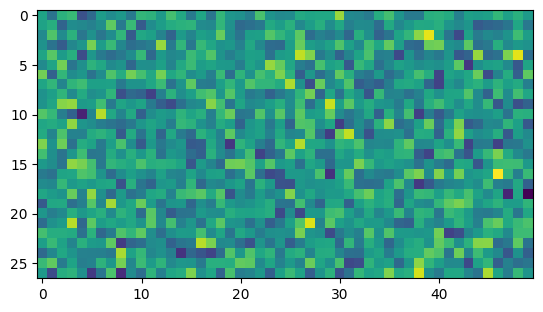

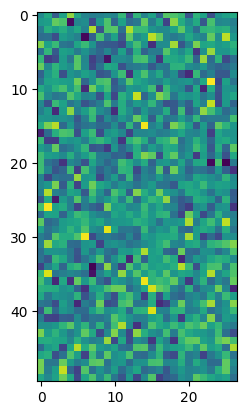

In [62]:
plt.imshow(W_1)
plt.show()
plt.imshow(W_2)
plt.show()

In [ ]:
def train(X, y, hidden_dim=50, learning_rate=0.01, epochs=1000):
    input_dim = X.shape[1]  # 27
    output_dim = y.shape[1]  # Also 27, for multi-class classification
    
    # Initialize parameters
    params = initialize_parameters(input_dim, hidden_dim, output_dim)
    
    for epoch in range(epochs):
        # Forward pass
        A2, cache = forward_pass(X, params)
        
        # Compute loss
        loss = compute_loss(y, A2)
        
        # Backpropagation
        grads = backward_pass(X, y, cache, params)
        
        # Update parameters
        params = update_parameters(params, grads,
